<a href="https://colab.research.google.com/github/MrVersatile007/My-Work-on-ML-algorithms/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Here I ude Iris data set for KNN model... 
#It consists of 150 observations four features and one class label

In [ ]:
#1 Handle data : Open data from csv and split into train and test data
#2 Similarity : Calculate the distances from two data instances
#3 Neighbors : locate K most similar data instances
#4 Response : Generate a response from a set of data instances
#5 Accuracy : Summarizing the accuracy of predictions
#6 Main : Tie it all together in main

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.shape

(150, 4)

In [16]:
df["target"]= iris.target

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [18]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [19]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,target
50,7.0,3.2,4.7,1.4,1,1
51,6.4,3.2,4.5,1.5,1,1
52,6.9,3.1,4.9,1.5,1,1
53,5.5,2.3,4.0,1.3,1,1
54,6.5,2.8,4.6,1.5,1,1


In [21]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,target
100,6.3,3.3,6.0,2.5,2,2
101,5.8,2.7,5.1,1.9,2,2
102,7.1,3.0,5.9,2.1,2,2
103,6.3,2.9,5.6,1.8,2,2
104,6.5,3.0,5.8,2.2,2,2


In [22]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

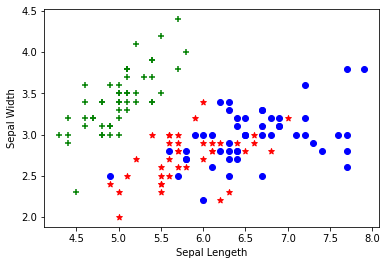

In [27]:
plt.xlabel("Sepal Lengeth")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"], color = "green", marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"], color = "red", marker ="*")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"], color = "blue")

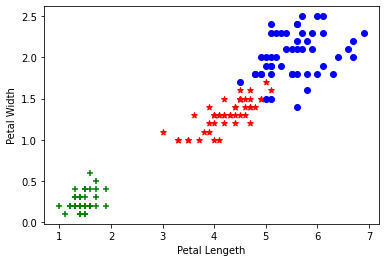

In [29]:
plt.xlabel("Petal Lengeth")
plt.ylabel("Petal Width")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"], color = "green", marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"], color = "red", marker="*")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"], color = "blue")


In [30]:
#train test split

In [68]:
from sklearn.model_selection import train_test_split
X= df.drop(["target"], axis= "columns")
y= df.target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=219)

In [123]:
len(X_train)

90

In [124]:
len(X_test)

60

In [125]:
#create a model now !

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=51) #but K=3 is ideal

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=51)

In [137]:
knn.score(X_test, y_test)

0.7

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
y_prediction = knn.predict(X_test)
cm= confusion_matrix(y_test, y_prediction)
cm

array([[ 0, 25,  0],
       [ 0, 16,  0],
       [ 0,  5, 14]])

Text(33.0, 0.5, 'True')

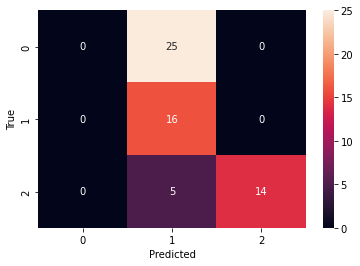

In [102]:
%matplotlib inline
import seaborn as sns
sns.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("True")